Данное исследование посвящено анализу факторов, связанных с развитием сахарного диабета.

# Этап 1. Первый датасет

В первом датасете df1 находятся следующие наблюдения: пациентки — женщины в возрасте не менее 21 года, принадлежащие к индейскому племени пима. Источник датасета: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [ ]:
import pandas as pd # Импортируем библиотеки для работы с датафреймами
import seaborn as sns # Импортируем библиотеку для визуализации
df1 = pd.read_csv('/content/diabetes.csv') # Считываю первый датасет
df1.head() # Вывожу первые 5 строк

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Загружаю файл в формате csv в Google Collab, импортирую библиотеку pandas для работы с датафреймами и seaborn для визуализации, далее открываем датафрейм df1, отобразив первые 5 строчек.

In [ ]:
df1.shape # Вывожу его форму

(768, 9)

Данная функция вернула кортеж, состоящий из двух элементов - количество наблюдений-строк (768 женщин) и 9 признаков-стобцов:
* Pregnancies: Количество беременностей (количественная дискретная)
* Glucose: Концентрация глюкозы в плазме крови через 2 часа при проведении перорального теста на толерантность к глюкозе (количественная дискретная)
* BloodPressure: Диастолическое артериальное давление (мм рт. ст.) (количественная дискретная)
* SkinThickness: Толщина кожной складки на трицепсе (мм) (количественная дискретная)
* Insulin: 2-часовой сывороточный инсулин (ме ед/мл) (количественная дискретная)
* BMI: индекс массы тела (вес в кг / (рост в м)^2) (количественная непрерывная)
* DiabetesPedigreeFunction: Наследственная функция диабета (количественная непрерывная)
* Age: Возраст (годы) (количественная дискретная)
* Outcome: наличие диабета (0 - нет или 1 - есть) (количественная бинарная)

Я разделила факторы, влиящие на наличие диабета, на 2 уровня влиятельности:
* 1 уровень: Глюкоза, Артериальное давление, Инсулин
* 2 уровень: ИМТ, толщина кожной складки, наследственность, возраст

Чтобы проверить гипотезу, можно построить логистическую регрессию, которая покажет, какие признаки имеют наибольшее влияние. Сперва убедимся, что в данных нет пропусков.

In [ ]:
df1.isna().sum() # isna() возвращает тот же датафрейм, где на месте пропусков стоит TrueБ в заполненных данных False, sum() суммирует пропуски

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Действительно, в таблице отсутствуют пропуски. Строю скрипичную диаграмму для призаков глюкоза и возраст.

<Axes: xlabel='Age', ylabel='Glucose'>

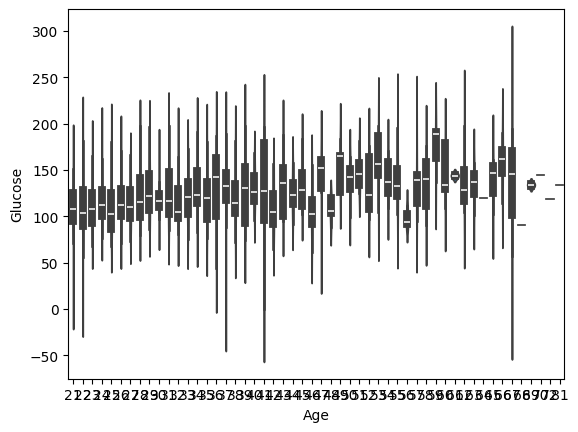

In [ ]:
sns.violinplot(x='Age', y='Glucose', data=df1) # Строю скрипичную диаграмму для выявления зависимости уровня глюкозы от возраста

Мы не можем сделать однозначные выводы о зависимости уровня глюкозы от возраста.

Перекодирую переменную Age согласно классификации ВОЗ: до 44 лет - молодой (1), 45-59 - средний возраст (2), 60-74 - пожилой возраст (3), 75-90 - старческий возраст (4), свыше 90 - долголетие.

In [ ]:
def age_type(age: int) -> int: # Фунция получает значение возраста типа int и возвращает int
# Функция классифицирует возраст наблюдаемых пациенток по классификации ВОЗ, данной выше
    if age <= 44:
        return 1
    if 45 <= age <= 59:
        return 2
    if 60 <= age <= 74:
        return 3
    if 75 <= age <= 90:
        return 4
    if age > 90:
        return 5

<Axes: xlabel='Age', ylabel='Count'>

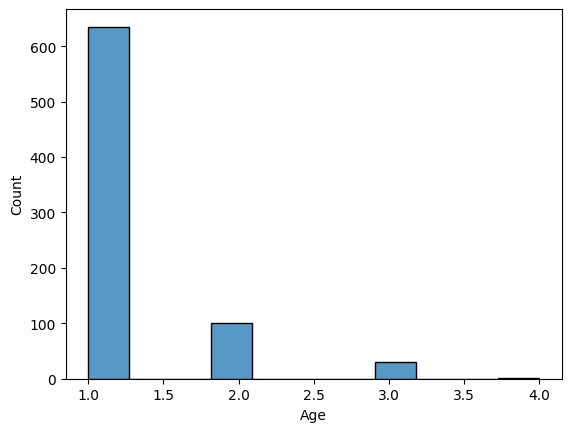

In [ ]:
df1['Age'] = df1['Age'].apply(age_type) # Колонка возраст теперь принимает другой вид посредством применения к ней функции выше
sns.histplot(data = df1, x='Age') # Строю гистограмму, показывающую распределение возраста

В выборке большая часть наблюдений - женщины молодого возраста, старше 90 лет в выборке нет.

Перекодирую переменную BMI: до 18.5 - недостаточный вес (1), 18.5-24 - нормальный вес (2), 25-30 - избыточный вес (3), свыше 30 - ожирение (4).

In [ ]:
df1['BMI'] = df1['BMI'].apply(lambda x: # Применяю функцию lambda к столбцу
                              1 if x < 18.5 else
                              2 if 18.5 <= x <= 24 else
                              3 if 25 <= x <= 30
                              else 4)
df1.head() # Вывожу df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,4,0.627,2,1
1,1,85,66,29,0,3,0.351,1,0
2,8,183,64,0,0,2,0.672,1,1
3,1,89,66,23,94,3,0.167,1,0
4,0,137,40,35,168,4,2.288,1,1


In [ ]:
from sklearn.model_selection import train_test_split # Импортирую функцию разделения на тренировочную и тестовую выборку
from sklearn.linear_model import LogisticRegression # Импортирую логистическую регрессию, которая предскажет вероятность того, что у человека диабет,
# проанализировав взаимосвзязь независимых признаков и целевой переменной
from sklearn.metrics import accuracy_score # Импортирую метрику точности модели

In [ ]:
X = df1.drop(columns='Outcome') # Х - все колонки, кроме колонки "Результат" - независимые переменные
y = df1['Outcome'] # Y - колонка "Результат" - целевая переменная
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46) # Разделил данные на тренировочные и тестовые, задал размер тестовых данных 20%

Разделяем выборку на тренировочную (модель будет обучаться на 80% данных) и тестовую (модель будет тестироваться на 20% данных и по ним будут видны метрики качества), устанавливаем random_state, чтобы исследование можно было повторить и данные не перемешивались каждый раз при запуске.

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=46) # Установил максимальное число итераций
model.fit(X_train, y_train) # Обучил модель по тренировочной выборке

LogisticRegression(max_iter=1000, random_state=46)

In [ ]:
y_pred = model.predict(X_test) # По тестовой выборке сделал предсказание
print("Точность модели (Accuracy):", accuracy_score(y_test, y_pred)) # Проверил точность, сравнив предсказанное значение с реальным

Точность модели (Accuracy): 0.7857142857142857


У модели достаточно высокая предсказательная точность - почти 79%. Можно сказать, что она предсказывает хорошо. Теперь определяю вес каждого признака.

In [ ]:
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]})
# Логистическая регрессия также позволяет узнать коэффициенты "влиятельности" каждого признака
coefficients.sort_values('Coefficient', ascending=False) # ascending = False сортирует по убыванию, без этого уточнения сортировка будет по возрастанию

,Feature,Coefficient
5,BMI,0.882542
6,DiabetesPedigreeFunction,0.709820
0,Pregnancies,0.146225
1,Glucose,0.036790
3,SkinThickness,0.002545
4,Insulin,-0.001364
2,BloodPressure,-0.012041
7,Age,-0.106295


Наибольшее влияние оказывает признак индекса массы тела. На втором месте - наследственность, на третьем - количество беременностей.
Все три признака положительные - то есть, чем больше их значение, тем вероятнее у женщины диабет.

**Вывод:**
Топ-3 признака с наибольшем влиянием - BMI, DiabetesPedigreeFunction, Pregnancies.

# Этап 2. Второй датасет (train + test)

Во втором датасете df2 находятся следующие наблюдения: мужчины и женщины различных возрастов и их демографические, поведенческие, медицинские характеристики. Источник данных: https://www.kaggle.com/datasets/christofel04/cardiovascular-study-dataset-predict-heart-disea
df2 разделен на тренировочную и тестовую выборку. Сначала я их соединяю, так как нужны все общие данные.

In [ ]:
df2_train = pd.read_csv('/content/train.csv')
df2_train.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df2_test = pd.read_csv('/content/test.csv')
df2_test.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


Убираю из тренировочной выборки TenYearCHD, чтобы это не помешало совмещению.



In [ ]:
df2_train.drop('TenYearCHD', inplace=True, axis=1) # Удалил колонку, указал, что изменения применены к исходному df2, а не к новому созданному объекту
# Также указал, что удаление происходит по столбцу: 1 - столбец, 0 - строка
df2_train.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0


In [ ]:
df2_merged = pd.concat([df2_train, df2_test], ignore_index=True) # Объединяю тренировочную и тестовую выборку
# Игнорирую индекс, индексация в соединенном датафрейме была порядковая
df2_merged.drop('id', inplace=True, axis=1)
df2_merged.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0


В датафрейме df2_merged находятся следующие столбцы:

* Age: возраст пациента
* Education: уровень образования
* Sex: мужской или женский («M» или «F»)
* Is_smoking: является ли пациент курильщиком в настоящее время («YES» или «NO»)
* CigsPerDay: количество сигарет, которые человек выкуривает в среднем за день
* BPMeds: принимал ли пациент препараты от давления
* PrevalentStroke: перенес ли пациент инсульт ранее
* Prevalent Hyp: страдал ли пациент гипертонией
* Diabetes: страдал ли пациент диабетом
* TotChol: уровень общего холестерина
* SysBP: систолическое артериальное давление
* DiaBP: диастолическое артериальное давление
* BMI: индекс массы тела
* HeartRate: частота сердечных сокращений
* Glucose: уровень глюкозы



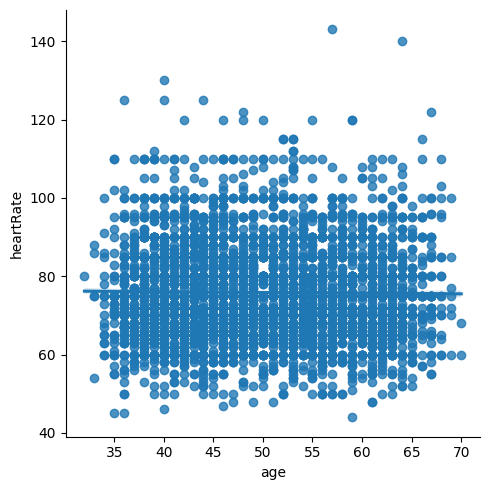

In [ ]:
sns.lmplot(x = 'age', y = 'heartRate', data = df2_merged) # Строю график рассеяния для выявления зависимости ЧСС от возраста

Мы не можем однозначно судить о взаимосвязи возраста и частоты сердечных сокращений, однако видим, что люди в возрасте от 35 до 70 лет в основном имеют от 60 до 90 ударов в минуту.

In [ ]:
df2_merged.shape

(4238, 15)

В df2_merged содержатся 4238 наблюдений и 15 признаков. Оцениваю, есть ли пропущенные данные.

In [ ]:
df2_merged.isna().sum()

,0
age,0
education,105
sex,0
is_smoking,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


Пропущенные значения могут исказить результаты. Удаляю их из датафрейма.

In [ ]:
df2 = df2_merged.dropna() # Удалил пропуски
df2.shape

(3656, 15)

Итого получилось 3656 наблюдений с полными данными.

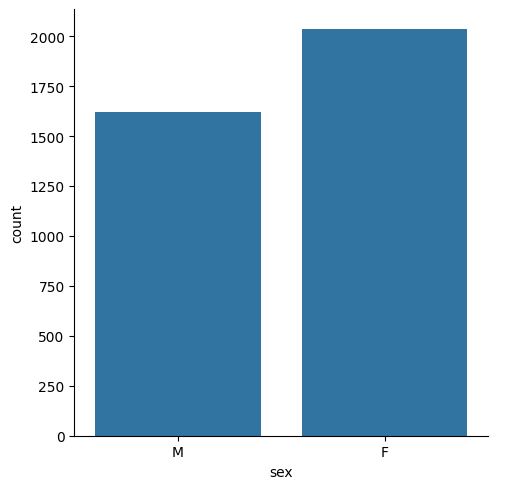

In [ ]:
sns.catplot(x='sex', data = df2, kind='count') # Строю частотное распределение по полу

В df2 больше женщин, чем мужчин.

Перекодирую возраст также, как в df1.

<ipython-input-82-d52bbd4adf66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age'] = df2['age'].apply(age_type)


<Axes: xlabel='age', ylabel='Count'>

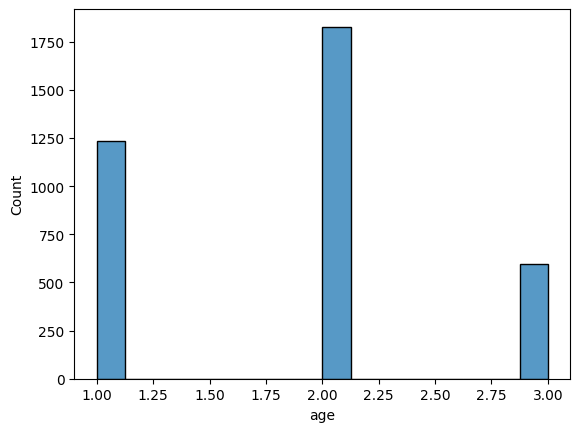

In [ ]:
df2['age'] = df2['age'].apply(age_type)
sns.histplot(data = df2, x='age')

Больше всего людей среднего возраста. Перекодирую ИМТ

In [ ]:
df2['BMI'] = df2['BMI'].apply(lambda x:
                              1 if x < 18.5 else
                              2 if 18.5 <= x <= 24 else
                              3 if 25 <= x <= 30
                              else 4)

<ipython-input-83-cb93fc9441cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BMI'] = df2['BMI'].apply(lambda x:


Также перекодирую пол и статус курения.

In [ ]:
def change_sex(sex: object) -> int: # Функция получает на вход переменную sex категориальную (object), на выходе будет int
# Если пол мужской, то вернет 1, если женский - 0
  if sex == 'M':
    return 1
  if sex == 'F':
    return 0

In [ ]:
df2['sex'] = df2['sex'].apply(change_sex)
df2['is_smoking'] = df2['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0) # Перекодировал в бинарную переменную
df2.head()

<ipython-input-85-e9026c2255f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sex'] = df2['sex'].apply(change_sex)
<ipython-input-85-e9026c2255f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['is_smoking'] = df2['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0) # Перекодировал в бинарную переменную


,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1,1,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,3,72.0,75.0
2,2,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,2,88.0,94.0
3,2,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,3,68.0,94.0
4,3,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,3,70.0,77.0
5,3,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,4,85.0,65.0


In [ ]:
X1 = df2.drop(columns='diabetes')
y1 = df2['diabetes']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=45)
model1 = LogisticRegression(max_iter=1000, random_state=45)
model1.fit(X_train1, y_train1)

LogisticRegression(max_iter=1000, random_state=45)

In [ ]:
y_pred1 = model1.predict(X_test1)
print("Точность модели (Accuracy):", accuracy_score(y_test1, y_pred1))

Точность модели (Accuracy): 0.9890710382513661


Точность модели составила почти 99%, что означает практически идеальное прогнозирование.

In [ ]:
coefficients1 = pd.DataFrame({'Feature': X_train1.columns, 'Coefficient': model1.coef_[0]})
coefficients1.sort_values('Coefficient', ascending=False)

,Feature,Coefficient
0,age,0.720042
2,sex,0.463188
7,prevalentHyp,0.455929
11,BMI,0.134825
5,BPMeds,0.133673
13,glucose,0.075711
3,is_smoking,0.045249
9,sysBP,0.005903
8,totChol,0.005069
12,heartRate,0.003246


Оказалось, что 4 наиболее влиятельных показателя: Возраст, Пол, Перенесенная гипертония и Перенесенный инсульт.
Первые 3 признака имеют положительную взаимосвязь с наличием диабета, то есть при увеличении показателя, вероятность диабета повышается. Последний признак - отрицательный: при увеличении показателя (не было инсульта -> был инсульт) вероятность наличия диабета снижается.

**Вывод:** Топ-4 самых влиятельных признака: Возраст, Пол, Пересенный инсульт, Перенесенная гипертония.

# Этап 3. Третий датасет

В третьем датасете df3 находятся следующие наблюдения: мужчины и женщины различных возрастов и их демографические, поведенческие, медицинские характеристики. Источник данных: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

In [ ]:
df3 = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')
df3.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df3.shape

(253680, 22)

В имеющихся данных 253680 наблюдений по 22 признакам. Почти все наблюдения бинарные, необходимо понять, какие из них не представляют важности.

In [ ]:
df3.isna().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


Пропусков нет. Перекодирую возраст (так как в этот датасете возраст закодирован 13-ступенчатой классификацией) и ИМТ.

In [ ]:
df3['BMI'] = df3['BMI'].apply(lambda x:
                              1 if x < 18.5 else
                              2 if 18.5 <= x <= 24 else
                              3 if 25 <= x <= 30
                              else 4)

In [ ]:
def change_age(age: float) -> int: # Функция принимает age в формате float и возвращает int
# Функция перекодирует возраст из 13-и ступенчатой классификации в 4-х ступенчатую
  if 1 <= age <= 5:
    return 1
  if 6 <= age <= 8:
    return 2
  if 9 <= age <= 11:
    return 3
  if 12 <= age <= 13:
    return 4

In [ ]:
df3['Age'] = df3['Age'].apply(change_age)
df3.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,4,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,3,4.0,3.0
1,0.0,0.0,0.0,0.0,3,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,2,6.0,1.0
2,0.0,1.0,1.0,1.0,3,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,3,4.0,8.0
3,0.0,1.0,0.0,1.0,3,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,3,3.0,6.0
4,0.0,1.0,1.0,1.0,2,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,3,5.0,4.0


<Axes: xlabel='Age', ylabel='Count'>

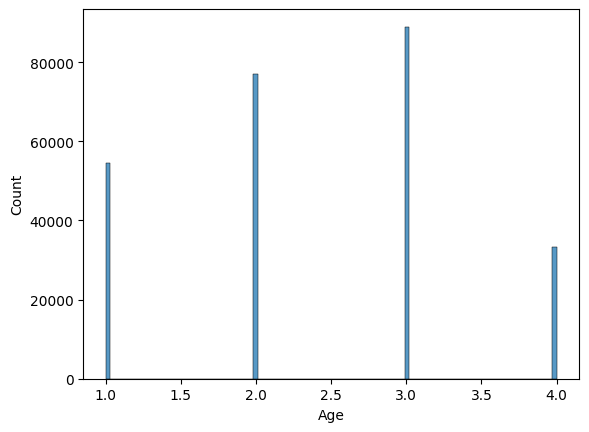

In [ ]:
sns.histplot(data=df3, x ='Age')

Больше всего в выборке людей среднего и пожилого возраста.

In [ ]:
X2 = df3.drop(columns='Diabetes_012')
y2 = df3['Diabetes_012']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=44)
model2 = LogisticRegression(max_iter=1000, random_state=44)
model2.fit(X_train2, y_train2)

LogisticRegression(max_iter=1000, random_state=44)

In [ ]:
y_pred2 = model2.predict(X_test2)
print("Точность модели (Accuracy):", accuracy_score(y_test2, y_pred2))

Точность модели (Accuracy): 0.847445600756859


Точность модели составила почти 85%.

In [ ]:
coefficients2 = pd.DataFrame({'Feature': X_train2.columns, 'Coefficient': model2.coef_[0]})
coefficients2.sort_values('Coefficient', ascending=False)

,Feature,Coefficient
10,HvyAlcoholConsump,0.353583
20,Income,0.044665
7,PhysActivity,0.032430
19,Education,0.031364
9,Veggies,0.024653
8,Fruits,0.014433
5,Stroke,0.014278
11,AnyHealthcare,0.013301
4,Smoker,0.008591
15,PhysHlth,0.003698


Интересно, что проверка уровня холестерина в последние 5 лет сильно снижает вероятнось его наличия. При этом ИМТ обратно коррелирует с наличием диабета. Вероятно, данные исследования могут быть некорректны.
Кроме того, если человек относится к группе, которая употребляет много алкоголя, вероятность наличия диабета у него повышается.

**Вывод:** Топ-5 показателей, влияющих на наличие диабета: Проверка холестерина, ИМТ, Высокий холестерин, Высокое АД, Употреблние алкоголя. Из них положительный только Употребление алкоголя.

# Этап 4. Финальное объединение

На данном этапе объединяю имеющиеся датафреймы и проанализирую их. Совмещаю датасеты по влиятельным признакам и по общим колонкам. В результате получится таблица с самыми влиятельными признаками по трем датасетам.
* Для df1 влиятельные признаки: BMI, DiabetesPedigreeFunction, Pregnancies, добавим также Age, Sex, BloodPressure (так как это встречается во всех датасетах)
* Для df2 влиятельные признаки: Возраст, Пол, Пересенная гипертония, Перенесенный инсульт, добавим также ИМТ
* Для df3 влиятельные признаки: Проверка холестерина, ИМТ, Высокий холестерин, Высокое АД, Употребление алкоголя, также добавляем возраст и пол, так как встречается у всех датасетов.

Получилось, что пересечение признаков = {Sex, Age, BMI, Bloodpressure, Diabetes_result}

Сначала объединяю df1 и df2.

In [ ]:
df1['Sex'] = 0 # Добавляю колонку пола в датасет 1, где все наблюдаемые - женщины
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Sex
0,6,148,72,35,0,4,0.627,2,1,0
1,1,85,66,29,0,3,0.351,1,0,0
2,8,183,64,0,0,2,0.672,1,1,0
3,1,89,66,23,94,3,0.167,1,0,0
4,0,137,40,35,168,4,2.288,1,1,0


In [ ]:
df2['diaBP'] = df2['diaBP'].astype(int) # В датасете 2 поменял формат признака Диастолическое давление на int

<ipython-input-100-7ff5c7fcf986>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['diaBP'] = df2['diaBP'].astype(int) # В датасете 2 поменял формат признака Диастолическое давление на int


In [ ]:
df2 = df2.rename(columns={'age': 'Age', 'diabetes': 'Outcome', 'diaBP': 'BloodPressure', 'sex': 'Sex'}) # Переименовал колонки, чтобы все хорошо совместилось
df2.head()

,Age,education,Sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,Outcome,totChol,sysBP,BloodPressure,BMI,heartRate,glucose
1,1,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98,3,72.0,75.0
2,2,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71,2,88.0,94.0
3,2,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88,3,68.0,94.0
4,3,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85,3,70.0,77.0
5,3,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121,4,85.0,65.0


In [ ]:
df1_clean = df1[['Sex', 'Age', 'BMI', 'BloodPressure', 'Outcome']] # Выбрал нужные колонки для совмещения
df2_clean = df2[['Sex', 'Age', 'BMI', 'BloodPressure', 'Outcome']] # Выбрал нужные колонки для совмещения с 1 датасетом в нужном порядке

In [ ]:
df1_merged_df2 = pd.concat([df1_clean, df2_clean], ignore_index=True) # Совмещаю датасеты 1 и 2
df1_merged_df2

,Sex,Age,BMI,BloodPressure,Outcome
0,0,2,4,72,1
1,0,1,3,66,0
2,0,1,2,64,1
3,0,1,3,66,0
4,0,1,4,40,1
...,...,...,...,...,...
4419,1,3,2,87,0
4420,0,2,4,91,0
4421,0,2,3,77,0
4422,0,2,2,67,0


In [ ]:
df3.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,4,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,3,4.0,3.0
1,0.0,0.0,0.0,0.0,3,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,2,6.0,1.0
2,0.0,1.0,1.0,1.0,3,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,3,4.0,8.0
3,0.0,1.0,0.0,1.0,3,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,3,3.0,6.0
4,0.0,1.0,1.0,1.0,2,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,3,5.0,4.0


In [ ]:
df3 = df3.rename(columns={'Diabetes_012': 'Outcome', 'HighBP': 'BloodPressure'}) # Переименовал колонки датасета 3 для правильного совмещения
df3.head()

,Outcome,BloodPressure,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,4,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,3,4.0,3.0
1,0.0,0.0,0.0,0.0,3,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,2,6.0,1.0
2,0.0,1.0,1.0,1.0,3,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,3,4.0,8.0
3,0.0,1.0,0.0,1.0,3,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,3,3.0,6.0
4,0.0,1.0,1.0,1.0,2,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,3,5.0,4.0


In [ ]:
df3_clean = df3[['Sex', 'Age', 'BMI', 'BloodPressure', 'Outcome']] # Выбрал в нужном порядке
df3_clean

,Sex,Age,BMI,BloodPressure,Outcome
0,0.0,3,4,1.0,0.0
1,0.0,2,3,0.0,0.0
2,0.0,3,3,1.0,0.0
3,0.0,3,3,1.0,0.0
4,0.0,3,2,1.0,0.0
...,...,...,...,...,...
253675,1.0,1,4,1.0,0.0
253676,0.0,3,1,1.0,2.0
253677,0.0,1,3,0.0,0.0
253678,1.0,2,2,1.0,0.0


Перекодирую давление из объединенного датасета в бинарную переменную: 1 - высокое, 0 - нормальное

In [ ]:
def change_BP(bp: float) -> int: # Функция получает АД в формате float, возвращает int
# Если давление высокое, то вернет 1, если нормальное, то 0
  if bp > 90:
    return 1
  else:
    return 0

In [ ]:
df1_merged_df2['BloodPressure'] = df1_merged_df2['BloodPressure'].apply(change_BP) # Применяю функцию
df1_merged_df2

,Sex,Age,BMI,BloodPressure,Outcome
0,0,2,4,0,1
1,0,1,3,0,0
2,0,1,2,0,1
3,0,1,3,0,0
4,0,1,4,0,1
...,...,...,...,...,...
4419,1,3,2,0,0
4420,0,2,4,1,0
4421,0,2,3,0,0
4422,0,2,2,0,0


In [ ]:
df3_clean[['Sex', 'BloodPressure', 'Outcome']] = df3_clean[['Sex', 'BloodPressure', 'Outcome']].astype(int) # Перекодировал в тип int

<ipython-input-109-e937ff1e56fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_clean[['Sex', 'BloodPressure', 'Outcome']] = df3_clean[['Sex', 'BloodPressure', 'Outcome']].astype(int) # Перекодировал в тип int


In [ ]:
df_full_merged = pd.concat([df1_merged_df2, df3_clean], ignore_index=True) # Совместил первые два датасета и третий
df = df_full_merged

In [ ]:
df

,Sex,Age,BMI,BloodPressure,Outcome
0,0,2,4,0,1
1,0,1,3,0,0
2,0,1,2,0,1
3,0,1,3,0,0
4,0,1,4,0,1
...,...,...,...,...,...
258099,1,1,4,1,0
258100,0,3,1,1,2
258101,0,1,3,0,0
258102,1,2,2,1,0


В итоге получился чистый соединенный датасет df, состоящий из закодированных выраженией.

В колонке результат должно быть значение 1 - есть диабет, 0 - нет. Перекодирую цифру 2 в 1, так как 2 - это тоже диабет (в датасете 3 1 - преддиабет, 2 - диабет)

In [ ]:
def code_diabetes(outcome: int) -> int: # Функция принимает outcome в формате int и возвращает формат int
# Функция перекодировала 2 (наличие диабета) в 1
  if outcome == 2:
    return 1
  else:
    return outcome

In [ ]:
df['Outcome'] = df['Outcome'].apply(code_diabetes)

<Axes: >

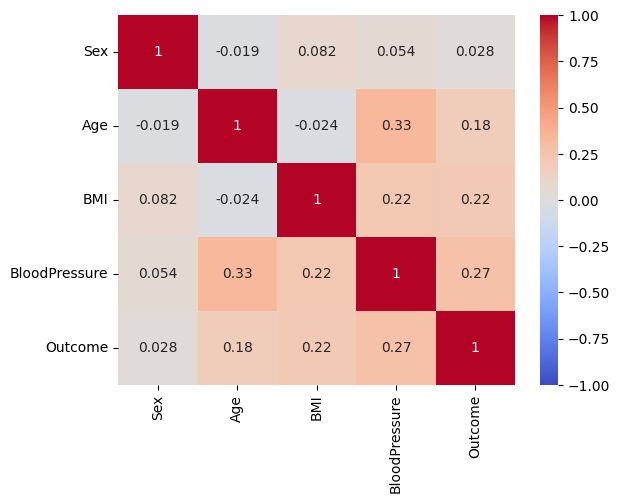

In [ ]:
corr = df.corr() # Смотрю корреляцию признаков
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
# Строю тепловую карту с помощью библиотеки seaborn
# Передаю в карту нашу корреляционную матрицу, указываю annot=True,
# это отображает числовые значения на квадратиках, указываем минимальное -1 и максимальное 1 (диапазон значений корреляции)
# пишу cmap=’coolwarm’, что задает теплые оттенки ближе к 1 и холодные к -1, это поможет визуально быстро отметить признаки,
# между которыми обратная взаимосвязь (корреляция менее 0) и прямая (корреляция больше 0)


Наибольшая корреляция между признаками Возраст и артериальное давление (0.33): график показывает, чем старше человек, тем выше его АД. Хотя это противоречит медицинским заключениям. Однако мы не обязаны верить корреляции в 0.33, так как это слабая положительная корреляция.

<Axes: xlabel='Age'>

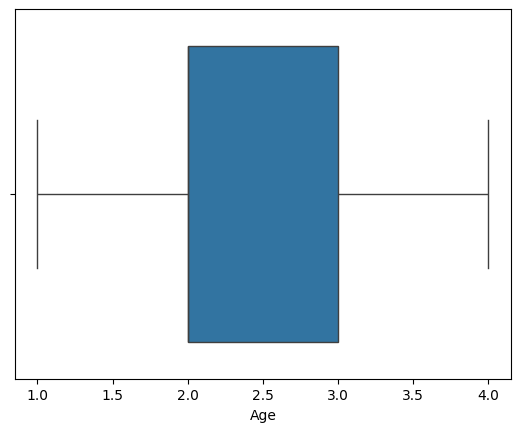

In [ ]:
sns.boxplot(x=df['Age'], data=df) # Строю ящик с усами, который показывает наличие выбросов и распределение данных

<Axes: xlabel='BMI'>

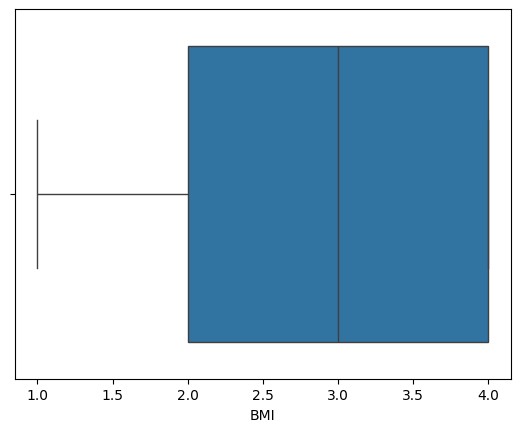

In [ ]:
sns.boxplot(x=df['BMI'], data=df)

Посмотрел выбросы (данные отличающиеся от большинства других) по данным Возраст (я предполагал, что встретятся люди сильно пожилого возраста и это будут выбросы) и ИМТ (думал, что ИМТ может содержать выбросы в виде недостаточного веса). Оказалось, что по обоим показателям выбросов нет.

Теперь строю логистическую регрессию.

In [ ]:
X3 = df.drop(columns='Outcome')
y3 = df['Outcome']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=43)
model3 = LogisticRegression(max_iter=1000, random_state=43)
model3.fit(X_train3, y_train3)

LogisticRegression(max_iter=1000, random_state=43)

In [ ]:
y_pred3 = model3.predict(X_test3)
print("Точность модели (Accuracy):", accuracy_score(y_test3, y_pred3))

Точность модели (Accuracy): 0.8386509366343154


Точность составила 84%.

In [ ]:
coefficients3 = pd.DataFrame({'Feature': X_train3.columns, 'Coefficient': model3.coef_[0]})
coefficients3.sort_values('Coefficient', ascending=False)

,Feature,Coefficient
3,BloodPressure,1.103650
2,BMI,0.776079
1,Age,0.443305
0,Sex,0.090086


**Финальные выводы:** данные исследования свидетельствуют о наличии коморбидности диабета и гипертонии - у диабетиков часто наблюдается гипертония. Модель выделила артериальное давление в качестве самого значимого фактора, (если у человека давление высокое, вероятность того, что у него диабет, сильно повышается).
На втором месте фактор ИМТ. В группе повышенного риска находятся люди с ожирением и высоким ИМТ (эти показатели влияют на возникновение гипертонии и диабета).
Третий по величине влияния фактор - возраст участников. При переходе от одной возрастной группы к старшей, вероятность наличия диабета повышается.

Благодарю за внимание!